### Вариант: классификация 8. ricci_vs_destefano

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Познакомьтесь с возможностями библиотеки sklearn по загрузке датасетов из репозитория openml.org

#### 2. Загрузите нужный вам датасет, выведите его основные характеристики: количество строк и столбцов, типы данных, количество значений в каждом столбце, основную статистическую информацию об атрибутах.

In [2]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='machine_cpu', version=1)

In [3]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125.0,256.0,6000.0,256.0,16.0,128.0
1,29.0,8000.0,32000.0,32.0,8.0,32.0
2,29.0,8000.0,32000.0,32.0,8.0,32.0
3,29.0,8000.0,32000.0,32.0,8.0,32.0
4,29.0,8000.0,16000.0,32.0,8.0,16.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MYCT    209 non-null    float64
 1   MMIN    209 non-null    float64
 2   MMAX    209 non-null    float64
 3   CACH    209 non-null    float64
 4   CHMIN   209 non-null    float64
 5   CHMAX   209 non-null    float64
dtypes: float64(6)
memory usage: 9.9 KB


In [5]:
df.shape

(209, 6)

In [6]:
df.describe().loc[['min', 'max', 'mean']]

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
min,17.000000,64.000000,64.00000,0.000000,0.000000,0.000000
max,1500.000000,32000.000000,64000.00000,256.000000,52.000000,176.000000
mean,203.822967,2867.980861,11796.15311,25.205742,4.698565,18.267943


In [7]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000


#### 3. Прочитайте и изложите в работе общее описание датасета. Опишите, решаемую моделированием проблему.

Набор данных содержит устные, письменные и комбинированные результаты тестов для пожарного департамента Нью-Хейвена за 2003 год. вступительные экзамены. Также указаны раса и позиция для каждого тестируемого. В данных представлены три расы: белая, латиноамериканцы и черная. Можно объединить чернокожих и латиноамериканцев в качестве меньшинства для использования методов классификации.

#### 4. Удалите, если нужно, нечисловые колонки в датасете.

ничего удалять не надо, все колонки имеют числовые значения

#### 5. При необходимости заполните нулем пропущенные значения.

In [8]:
df.isna().sum(axis=0)

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
dtype: int64

Нулевых значений нет

#### 6. Постройте гистограммы распределения по каждому признаку.

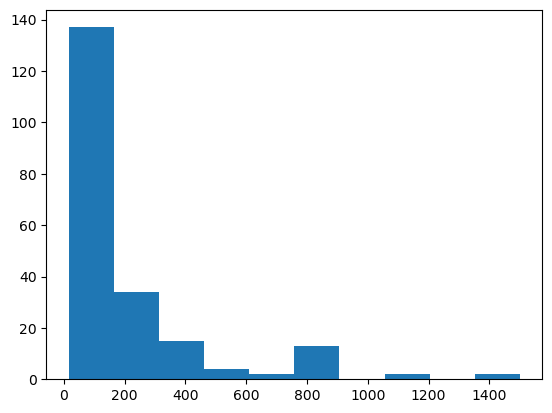

In [9]:
plt.hist(df['MYCT']);

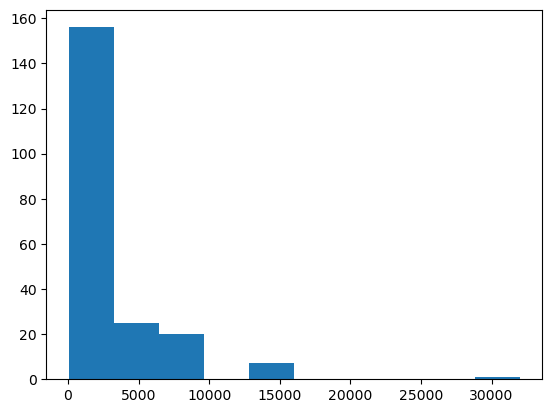

In [10]:
plt.hist(df['MMIN']);

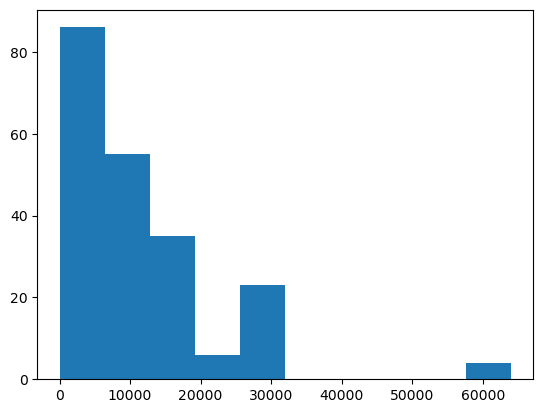

In [11]:
plt.hist(df['MMAX']);

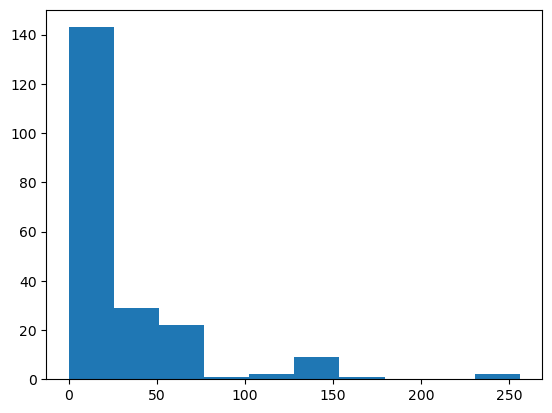

In [15]:
plt.hist(df['CACH']);

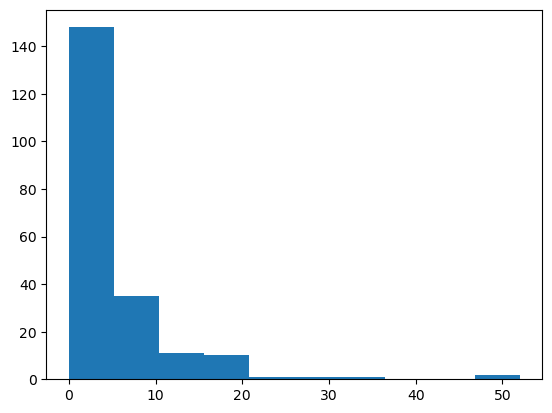

In [16]:
plt.hist(df['CHMIN']);

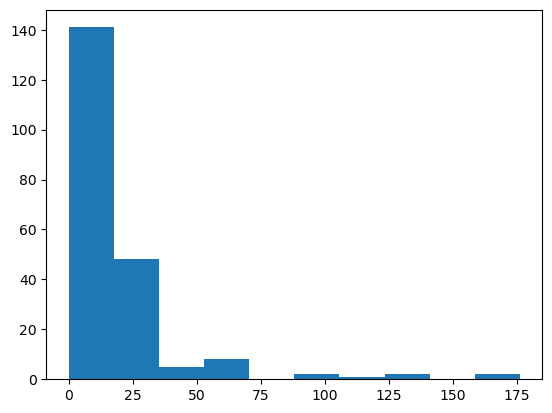

In [17]:
plt.hist(df['CHMAX']);

#### 7. Постройте модель машинного обучения, обучите ее на всем датасете.

In [18]:
y = df.CHMAX
X = df.drop(["CHMAX"], axis=1)

In [19]:
y.shape, X.shape

((209,), (209, 5))

In [20]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [21]:
logistic.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 5.44803543e-03  2.09986646e-04 -1.93029579e-04 -7.99152219e-07
 -1.40301308e-05]


In [23]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

MYCT 0.0054480354329978385
MMIN 0.00020998664632473018
MMAX -0.00019302957884342954
CACH -7.991522192186206e-07
CHMIN -1.403013077870421e-05


In [24]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [ 2.10967975e-06  4.04185486e-06  6.03777379e-06  6.60589046e-06
  6.87398105e-06  7.89770000e-06  2.08511166e-05  5.02429643e-07
  7.45738950e-06 -1.63543277e-06 -2.39471741e-06 -1.32476174e-06
 -1.92736645e-07  7.28153522e-07 -4.33315163e-06 -2.76999433e-07
 -1.26041472e-06  3.09069172e-06 -4.42888945e-06 -1.31926989e-06
 -1.84005862e-06 -1.05026120e-05 -2.76105836e-06 -1.50566215e-06
 -4.42898001e-06 -4.59328874e-06 -4.20025089e-06 -5.75862799e-06
 -2.52683933e-06  2.64883776e-07 -1.11777928e-05]


In [25]:
y_pred = logistic.predict(X)

In [26]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

128.0 54.0
32.0 32.0
32.0 32.0
32.0 32.0
16.0 24.0
32.0 32.0
32.0 32.0
32.0 32.0
32.0 32.0
64.0 32.0


In [27]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[ 0,  3,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  3,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  5,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  1,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  2,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  

#### 8. Измерьте эффективность данной модели и сделайте вывод о ее применимости на практике.

In [28]:
metrics.accuracy_score(y, y_pred)

0.2679425837320574

In [29]:
metrics.precision_score(y, y_pred, average='micro')




0.2679425837320574

"БЕЗ параметра average выдаёт ошибку ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted' "

Значение метрики показывает, что модель делает ошибки в 73.3% процентов случаев.

In [30]:
metrics.recall_score(y, y_pred, average='micro')

0.2679425837320574

Модель выдаст верные результаты в 98% случаев, т.е. модель достаточно успешно предсказывает результаты.

#### 9. Визуализируйте результаты моделирования, сравните реальные и предсказанные значения.

Text(0.5, 23.52222222222222, 'Предсказанные значения')

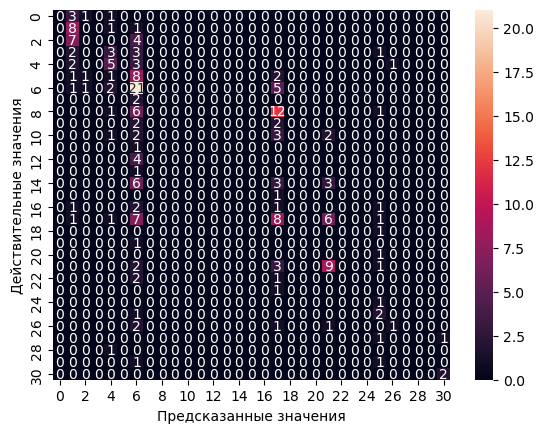

In [31]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

#### 10. Используйте несколько простых моделей машинного обучения. Сравните их эффективность между собой.

Метод опорных векторов

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly = poly.fit_transform(X)
poly

In [ ]:
polynomial = LogisticRegression()
polynomial.fit(poly, y_transformed)
y_pred_poly = polynomial.predict(poly)


In [ ]:
polynomial.score(poly, y_transformed)

Метод k ближайших соседей

In [37]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(weights='distance')

In [38]:
neighbor.fit(X, y)

KNeighborsClassifier(weights='distance')

In [39]:
y_pred = neighbor.predict(X)

In [40]:
matrix = metrics.confusion_matrix(y, y_pred)
matrix

array([[ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  

In [41]:
accuracy = metrics.accuracy_score(y, y_pred)
accuracy

0.9808612440191388

In [44]:
precision = metrics.precision_score(y, y_pred, average="micro")
precision

0.9808612440191388

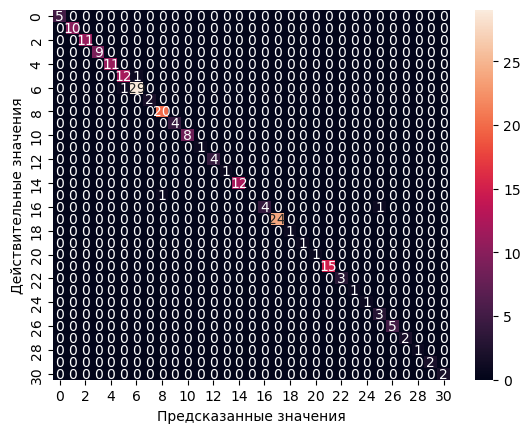

In [45]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(matrix),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()